1.import library



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Car_Purchasing_Data.csv",encoding='ISO-8859-1')

In [ ]:
df.head(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


2.visualize the dataset

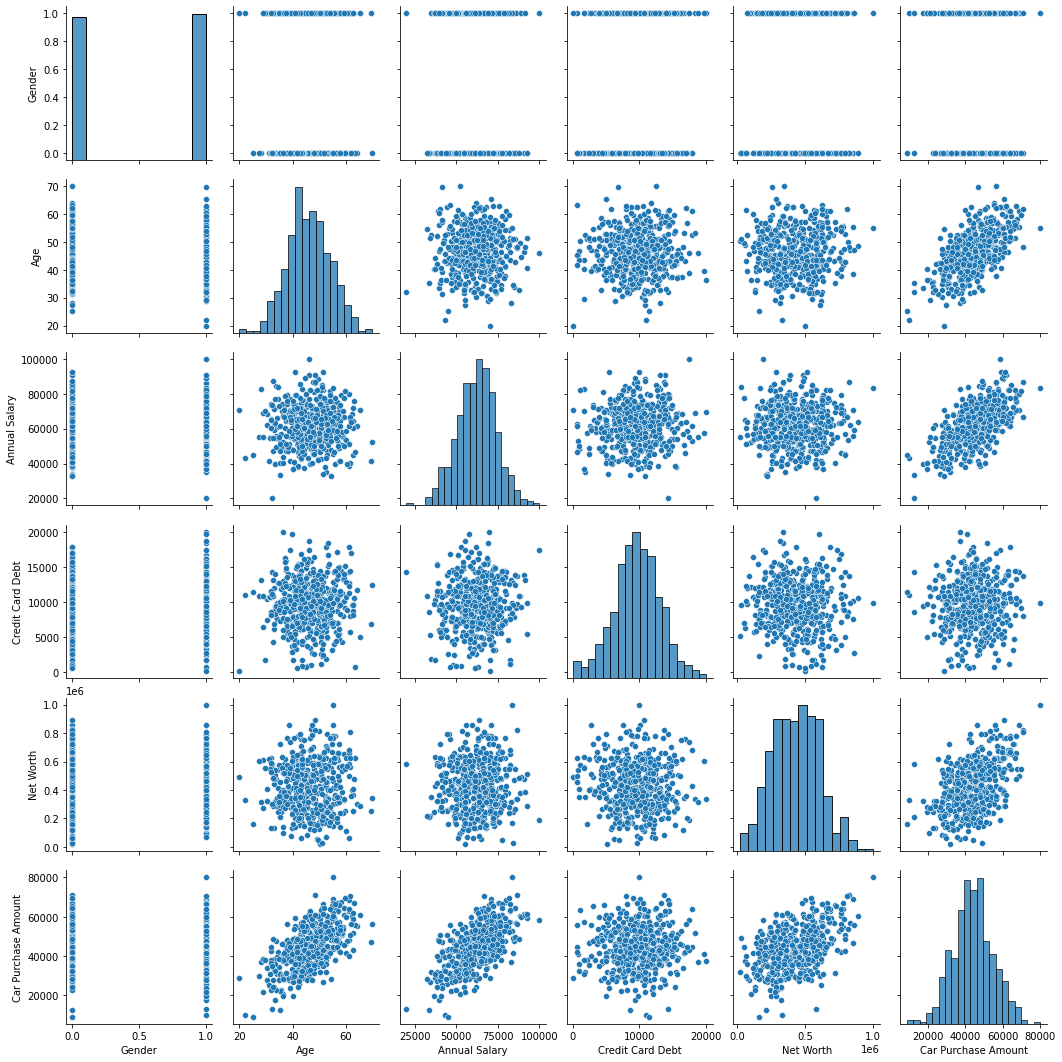

In [ ]:
sns.pairplot(df)

In [ ]:
X=df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [ ]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [ ]:
y=df['Car Purchase Amount']

In [ ]:
X.shape
y.shape

(500,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [ ]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [ ]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [ ]:
y=y.values.reshape(-1,1)

In [ ]:

y_scaled=scaler.fit_transform(y)


#train the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=25,  verbose=1, validation_split=0.2)


Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1576 - val_loss: 0.0828
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0456 - val_loss: 0.0217
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0181
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0129
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0099
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0091
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0087
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0078
Epoch 11

EVALUATING THE MODEL

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


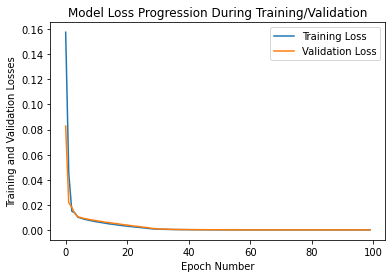

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [ ]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 

# ***(Note that input data must be normalized)***

X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
#X_test_sample = np.array([[1, 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

y_predict_sample = model.predict(X_test_sample)

print('Expected Purchase Amount=', y_predict_sample)
y_predict_sample_orig = scaler.inverse_transform(y_predict_sample)
print('Expected Purchase Amount=', y_predict_sample_orig)

Expected Purchase Amount= [[0.37252426]]
Expected Purchase Amount= [[35449.223]]
